# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
#install.packages('tidyverse')
library(tidyverse) #install.packages('tidyverse')
setwd("/Users/asalyunusova/Documents/Data_Science/DataSciencePsychNeuro_CMU85732/Homeworks/hcp_data")
hcp_data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv", stringsAsFactors = TRUE)
d1 <-hcp_data %>%
  select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) #make new dataframe
head(hcp_data) #look at first few rows of data frame
d1 <- d1  %>% na.omit()
anyNA(d1)
#look at first few rows of new data frame
head(d1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] FALSE

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

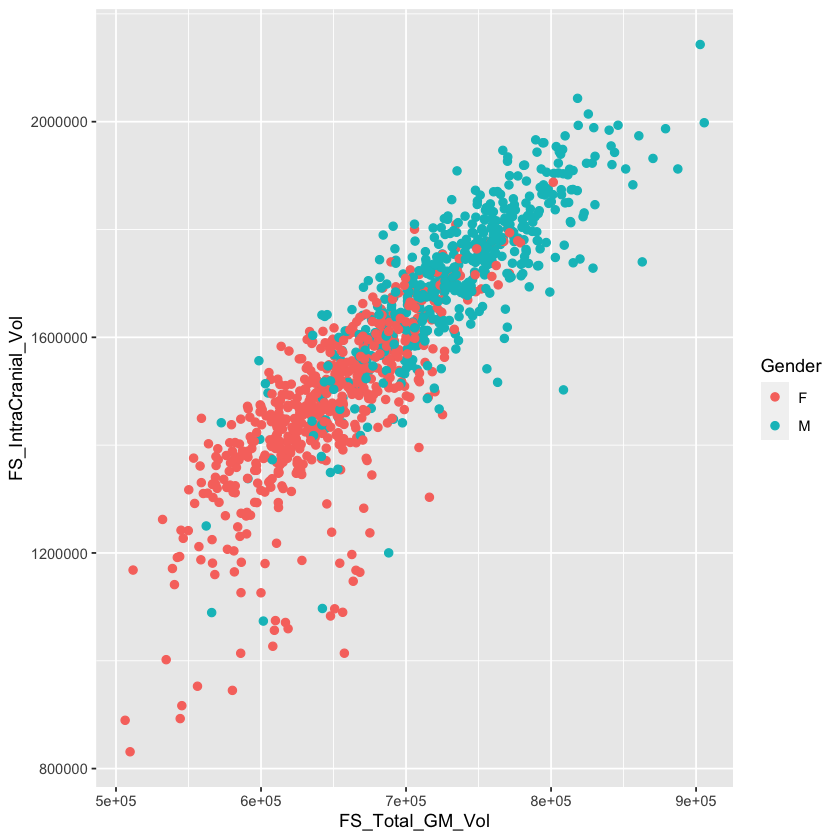

In [2]:
ggplot(d1,aes(x=FS_Total_GM_Vol,y=FS_IntraCranial_Vol,col=Gender)) + geom_point(size=2) # plot grey matter volume against intracranial volume and gender

What patterns do you observe in the scatter plot?

> *Looking at the scatterplot, we see that males tend to cluster in the area of greater grey matter volume and greater total intracranial volume, while females are clustered towards the left with lower total grey matter volume and total intracranial volume. In other words, as total grey matter volume and total intracranial volume increase, the subject is more likely to be male.* 
> 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [8]:
d1$Gender.Dummy<-ifelse(d1$Gender=="M",1,0) #create dummy variable so that females =0, males =1
head(d1)
logreg <- glm(Gender.Dummy ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data= d1, family = binomial)
summary(logreg)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol,Gender.Dummy
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>
2,100206,M,130.42,1864518,543134,807245,1
3,100307,F,112.56,1512540,407292,664124,0
4,100408,M,121.18,1684117,500417,726206,1
5,100610,M,126.53,1816044,512946,762308,1
6,101006,F,101.85,1437868,429449,579632,0
7,101107,M,107.04,1512727,416995,665024,1



Call:
glm(formula = Gender.Dummy ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + 
    FS_IntraCranial_Vol, family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Looking at the p-value column, we see that total grey matter volume (p=4.70e-10)and total intracranial volume (p=2.01e-05) are significantly associated with gender.* 
> 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [10]:
threshold = 0.5
y_hat <- data.frame(predict(logreg, type = "response"))
y_hat <- data.frame(y_hat[,1])
colnames(y_hat) <- "predicted_value"

y_hat$predicted_hat <- ifelse(y_hat$predicted_value > threshold, 1,0)

confusion_d1 = data.frame(y_hat$predicted_hat, d1$Gender.Dummy)
colnames(confusion_d1) = c('predicted', 'actual')
table (confusion_d1)

print(paste("Accuracy:",mean(confusion_d1$predicted == confusion_d1$actual)))

         actual
predicted   0   1
        0 516 110
        1  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

>*The prediction accuracy for gender from the full model is 82.03%* 
> 

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] "confidence intervals: 0.504518353750136 , 0.506387306627223"


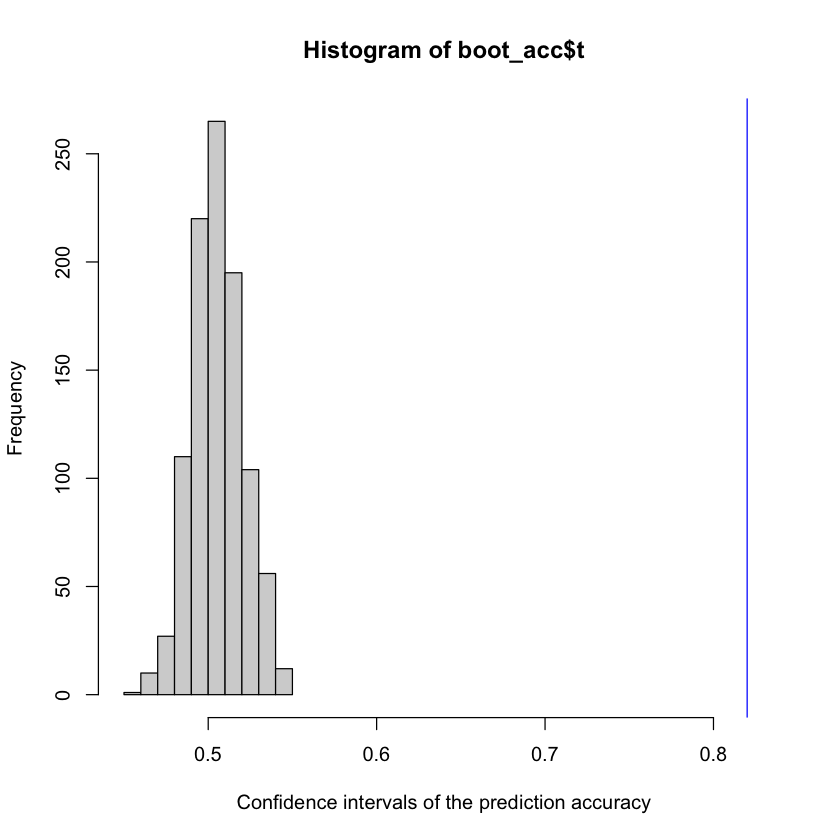

In [12]:
library(boot)

acc_fn <- function(data, index) {
  logreg <- glm(Gender.Dummy ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + FS_Tot_WM_Vol, data = d1, subset = index, family = 'binomial')
  y_hat <- data.frame(predict(logreg, type = "response"))
  y_hat <- data.frame(y_hat[,1])
  colnames(y_hat) <- "predicted_value"
  
  y_hat$predicted_gender <- ifelse(y_hat$predicted_value > threshold, 1, 0)
  y_hat$true_gender <- d1$Gender.Dummy
  y_hat <- y_hat %>%
    mutate(Correct = predicted_gender == true_gender)
  
  accuracy <- mean(y_hat$Correct)
  
  return(accuracy)
}


boot_acc <- boot(d1, accuracy_fn, R=1000)

hist(boot_acc$t, xlab = 'Confidence intervals of the prediction accuracy', xlim=c(0.45, 0.83))
abline(v=.82,col="blue")

acc_mean <- mean(boot_acc$t)
acc_sd <- sd(boot_acc$t)

error <- qnorm(0.975)*acc_sd/sqrt(1000)
left <- acc_mean - error
right <- acc_mean + error

print(paste('confidence intervals:', left,',', right))

How robust is the prediction accuracy of the full model?

> *We see that the confidence intervals fall between 0.50 and 0.51, therefore the prediction accuracy of the full model is not very robust, especially when we compare to our previous prediction accuracy for gender which was 82%* 
> 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

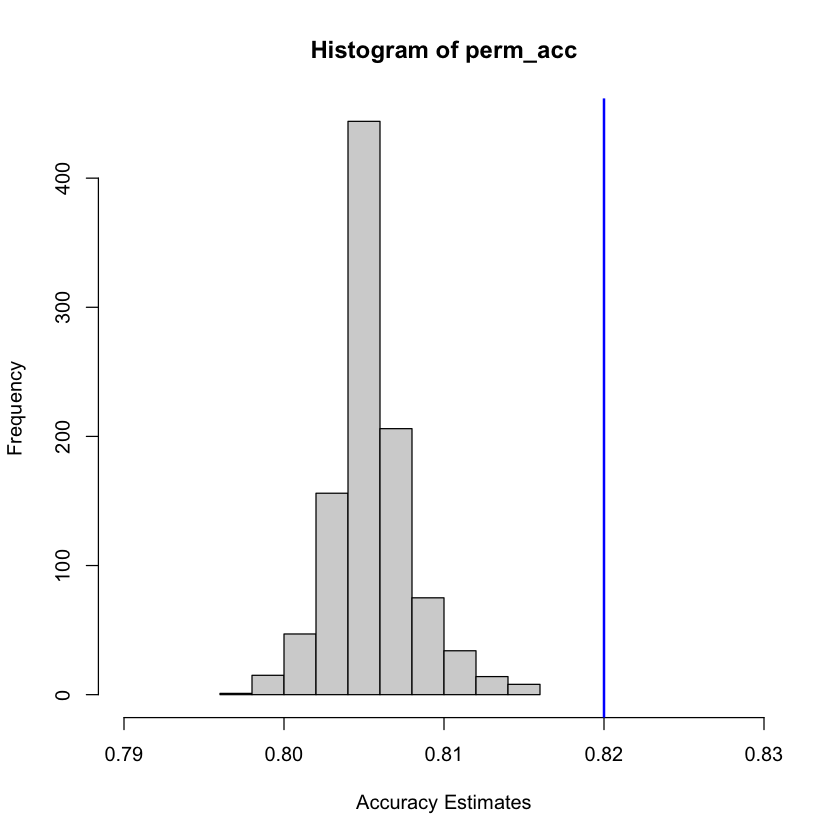

In [13]:
perm_gm <- d1 #to be permuted in the for loop

n_obs = dim(d1)[1]

r_perm = 1000

perm_acc=matrix(NA,nrow = r_perm , ncol=1) #filling with nas at first

for(i in 1:r_perm) {
  perm_gm$FS_Total_GM_Vol <- d1$FS_Total_GM_Vol[sample(n_obs)] # randomly shuffle grey matter
  
  logreg <- glm(Gender.Dummy ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + FS_Tot_WM_Vol, data = perm_gm, family = 'binomial')
  y_hat <- data.frame(predict(logreg, type = "response"))
  y_hat <- data.frame(y_hat[,1])
  colnames(y_hat) <- "predicted_value"
  
  y_hat$predicted_gender <- ifelse(y_hat$predicted_value > threshold, 1, 0)
  y_hat$true_gender <- d1$Gender.Dummy
  y_hat <- y_hat %>%
    mutate(Correct = predicted_gender == true_gender)
  
  perm_acc[i] <- mean(y_hat$Correct)
  
}

hist(perm_acc, xlab = 'Accuracy Estimates', xlim=c(0.79,0.83))
abline(v=0.82,col="blue",lwd=2)


How much does the grey matter volume influence the prediction accuracy of the model?

> *We see that the permutation test for grey matter effects is closer to the 82% model prediction accuracy from problem #2. Therefore, grey matter volume greatly influences the prediction accuracy of the model. For example, looking at the boostrapping model, where we include other variables like intracranial volume and white matter volume, our prediction accuracy is around 50% which is far below the original 82%.* 
> 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Bootstrapping examines "uncertainity" of the model within a dataset through techniques such as random resampling with replacement. Permutation tests on the other hand break down the relationship between your variables of interest (e.g., gender and grey matter volume) while keeping the structure between others (e.g., intracranial volume, white matter volume). This is usually done with techniques that shuffle the relationship between your x and y variable. It is approporiate to use bootstrapping when you're trying to understand the range of values in your outcome of interest. In our example above we were seeing how gender was influencing grey matter volume, white matter volume, and intracranial volume. Permutation tests on the other hand are appropriate to use when you want to examine what kind of pattern you would expect to see if there was no statistical relationship between the variables of interest.*> 

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Jenah Black, Emefa Akwayena*